In [1]:
!pip3 install tensorflow

  Using cached tensorflow-2.16.1-cp311-cp311-macosx_12_0_arm64.whl.metadata (4.1 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.10.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached ml_dtypes-0.3.2-cp311-cp311-macosx_10_9_universal2.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached protobuf-4.25.3-cp37-abi3-macosx_10_9_universal2.whl.metadata (541 bytes)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.16.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.6 kB)
  Using cached grp

In [2]:
!pip3 install matplotlib

  Using cached matplotlib-3.8.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached contourpy-1.2.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.50.0-cp311-cp311-macosx_10_9_universal2.whl.metadata (159 kB)
  Using cached kiwisolver-1.4.5-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached pillow-10.3.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.8.3-cp311-cp311-macosx_11_0_arm64.whl (7.5 MB)
Using cached contourpy-1.2.1-cp311-cp311-macosx_11_0_arm64.whl (245 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.50.0-cp311-cp311-macosx_10_9_universal2.whl (2.8 MB)
Using cached kiwisolver-1.4.5-cp311-cp311-macosx_11_0_arm64.whl (66 kB)
Using cached pillow-10.3.0-cp311-cp311-macosx_11_0_arm64.whl (3.4 MB)
Using cached pyparsing-3.1.2-py

In [3]:
!pip3 install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 102.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.3/491.3 kB 71.3 MB/s eta 0:00:00


## Import the libraries

In [4]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import math

## Setting of the main hyper-parameters of the model

In [5]:
n_epochs = 30   # Number of optimization epochs
n_layers = 1    # Number of random layers
n_train = 50    # Size of the train dataset
n_test = 30     # Size of the test dataset
n_channels = 4 # Number of channels

SAVE_PATH = "../results/"  # Data saving folder
PREPROCESS = True           # If False, skip quantum processing and load data from SAVE_PATH
np.random.seed(0)           # Seed for NumPy random number generator
tf.random.set_seed(0)       # Seed for TensorFlow random number generator


## Loading of the MNIST dataset

In [6]:
mnist_dataset = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()

# Reduce dataset size
train_images = train_images[:n_train]
train_labels = train_labels[:n_train]
test_images = test_images[:n_test]
test_labels = test_labels[:n_test]

# Normalize pixel values within 0 and 1
train_images = train_images / 255
test_images = test_images / 255

# Add extra dimension for convolution channels
train_images = np.array(train_images[..., tf.newaxis], requires_grad=False)
test_images = np.array(test_images[..., tf.newaxis], requires_grad=False)

## Quantum circuit as a convolution kernel

In [7]:
dev = qml.device("default.qubit", wires=n_channels)
# Random circuit parameters
rand_params = np.random.uniform(high=2 * np.pi, size=(n_layers, n_channels))

@qml.qnode(dev)
def circuit(phi):
    # Encoding of 4 classical input values
    for j in range(4):
        qml.RY(np.pi * phi[j], wires=j)

    # Random quantum circuit
    RandomLayers(rand_params, wires=list(range(n_channels)))

    # Measurement producing 4 classical output values
    return [qml.expval(qml.PauliZ(j)) for j in range(4)]

## Quantum Inspired  and Quantum convulation as Filters

In [8]:
def rotation_y(angle):
    cossine_angle = math.cos(np.pi*angle)
    sine_angle = math.sin(np.pi*angle)
    return(np.array([[cossine_angle, -sine_angle ],[ sine_angle ,cossine_angle]]))



def classic_filter(image):
    """Convolves the input image with by taking the trace of the rotation matrix applied for the image pixel"""
    out = np.zeros((14, 14, n_channels ))
    # Loop over the coordinates of the top-left pixel of 2X2 squares
    for j in range(0, 28, 2):
        for k in range(0, 28, 2):
            # Process a squared 2x2 region of the image with a rotation matix and take the trace
            results = []
            for pixel in [image[j, k, 0], image[j, k + 1, 0], image[j + 1, k, 0],image[j + 1, k + 1, 0]]:
                results.append(np.trace(rotation_y(pixel)))
                # results.append(np.linalg.det(rotation_y(pixel)))
                # results.append(pixel*np.linalg.det(rotation_y(pixel)))
                # results.append(pixel*np.trace(rotation_y(pixel)))
 
            # print(results)
            # out[j // 2, k // 2, 0] = np.sum(results)
            # # Assign expectation values to different channels of the output pixel (j/2, k/2)
            for c in range(n_channels):
                out[j // 2, k // 2, c] = results[c]
                
    return out

def quanv(image):
    """Convolves the input image with many applications of the same quantum circuit."""
    out = np.zeros((14, 14, n_channels))

    # Loop over the coordinates of the top-left pixel of 2X2 squares
    for j in range(0, 28, 2):
        for k in range(0, 28, 2):
            # Process a squared 2x2 region of the image with a quantum circuit
            q_results = circuit(
                [
                    image[j, k, 0],
                    image[j, k + 1, 0],
                    image[j + 1, k, 0],
                    image[j + 1, k + 1, 0]
                ]
            )
            # Assign expectation values to different channels of the output pixel (j/2, k/2)
            for c in range(4):
                out[j // 2, k // 2, c] = q_results[c]
    return out

## pre-processing of the dataset, applying the filter

In [9]:
def apply_filter(image, type ):
    filtered_images = []
    print("fitlered pre-processing of images:")
    for idx, img in enumerate(image):
        print("{}/{}        ".format(idx + 1, np.shape(image)[0]), end="\r")
        if type == 0:
            filtered_images.append(classic_filter(img))
        elif type == 1:
            filtered_images.append(quanv(img))
    filtered_images = np.asarray(filtered_images)

    return(filtered_images)


 # apply the classical filter   

if PREPROCESS == True:
    filtered_train_images =  apply_filter(train_images, type=0)
    filtered_test_images = apply_filter(test_images, type=0)
# Save pre-processed images
    np.save(SAVE_PATH + "filtered_train_images.npy", filtered_train_images)
    np.save(SAVE_PATH + "filtered_test_images.npy", filtered_test_images)

 # apply the quantum filter   
    q_train_images = apply_filter(train_images, type=1)
    q_test_images = apply_filter(test_images, type=1)
    np.save(SAVE_PATH + "q_train_images.npy", q_train_images)
    np.save(SAVE_PATH + "q_test_images.npy", q_test_images)


fitlered pre-processing of images:
fitlered pre-processing of images:
fitlered pre-processing of images:
fitlered pre-processing of images:


In [10]:
# Load pre-processed images
filtered_train_images = np.load(SAVE_PATH + "filtered_train_images.npy")
filtered_test_images = np.load(SAVE_PATH + "filtered_test_images.npy")
q_train_images = np.load(SAVE_PATH + "q_train_images.npy")
q_test_images = np.load(SAVE_PATH + "q_test_images.npy")

In [11]:
np.shape(train_images)[0]

50

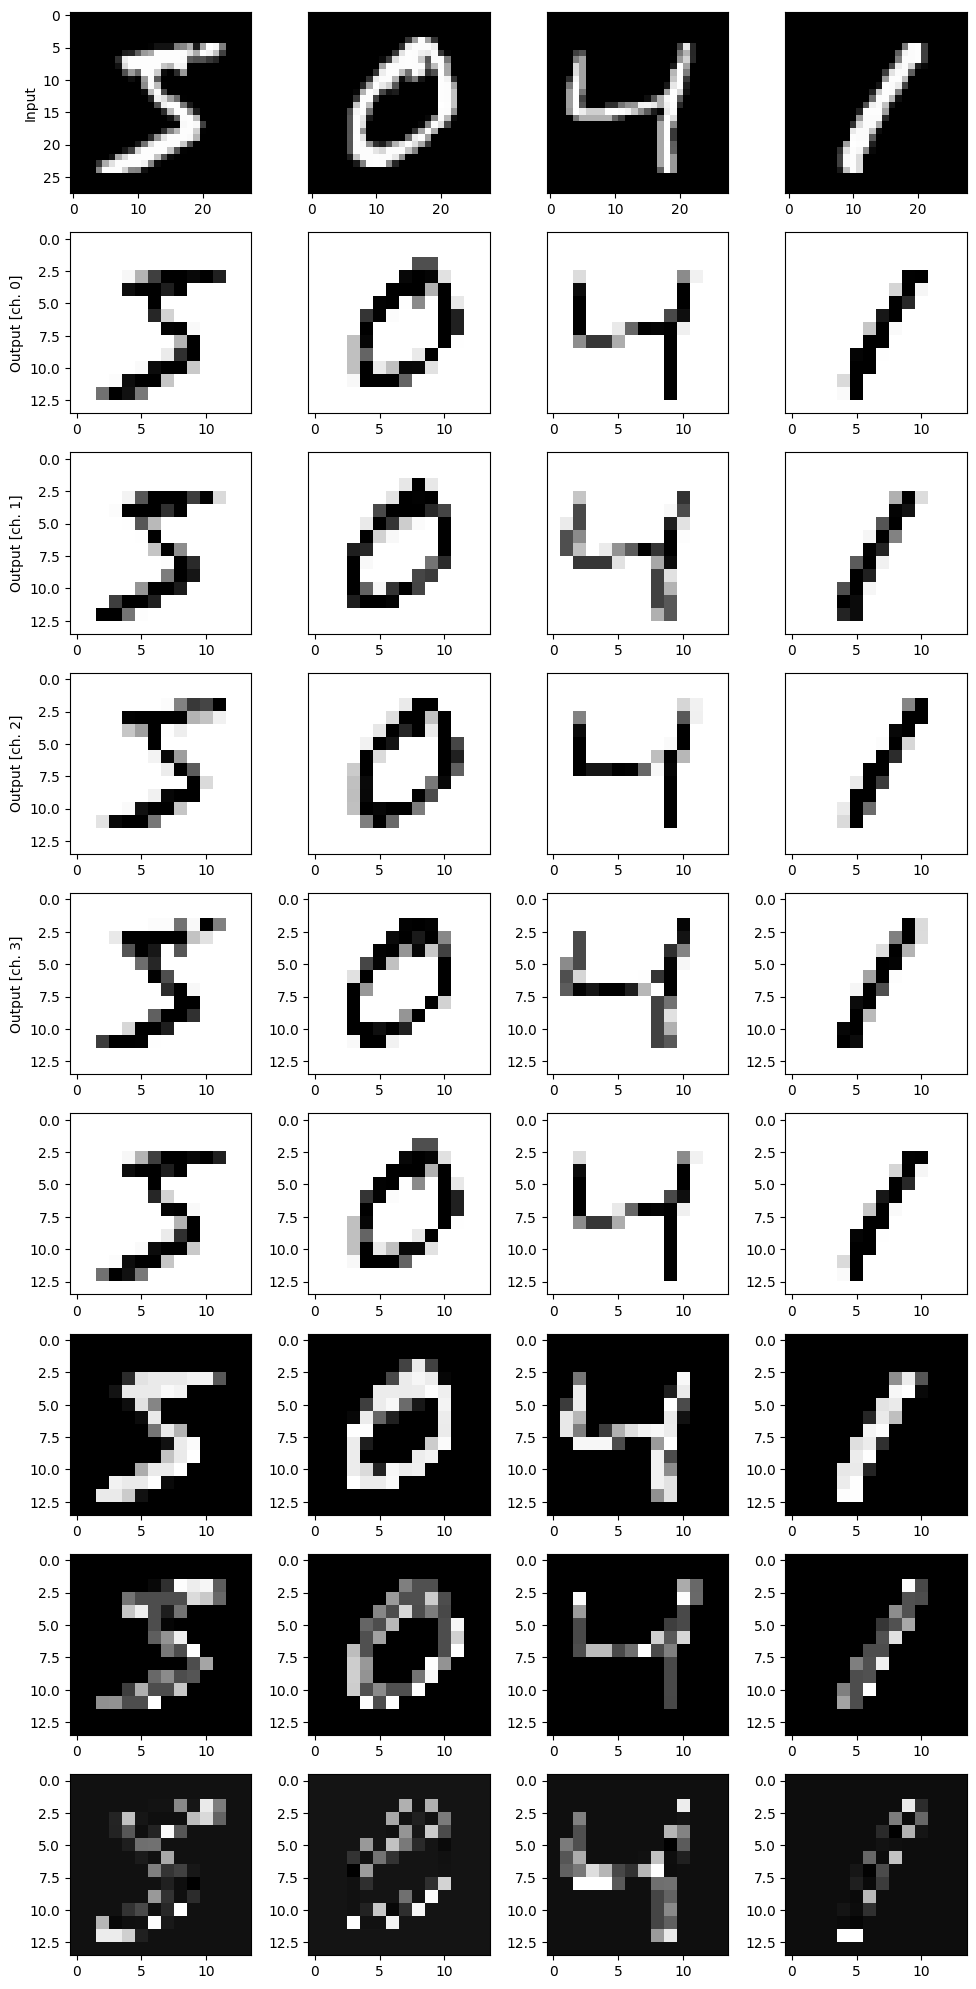

In [12]:
n_samples = 4

fig, axes = plt.subplots(1 + n_channels+4, n_samples, figsize=(10, 20))
for k in range(n_samples):
    axes[0, 0].set_ylabel("Input")
    if k != 0:
        axes[0, k].yaxis.set_visible(False)
    axes[0, k].imshow(train_images[k, :, :, 0], cmap="gray")


    # Plot all output channels
    for c in range(n_channels):
        axes[c + 1, 0].set_ylabel("Output [ch. {}]".format(c))
        if k != 0:
            axes[c, k].yaxis.set_visible(False)
        axes[c + 1, k].imshow(filtered_train_images[k, :, :, c], cmap="gray")
        axes[c + 5, k].imshow(q_train_images[k, :, :, c], cmap="gray")


plt.tight_layout()
plt.show()

## Define the Model

In [13]:
def MyModel():
    """Initializes and returns a custom Keras model
    which is ready to be trained."""
    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

## Training

In [14]:
classical_filtered_model = MyModel()

classical_filtered_history = classical_filtered_model.fit(
    filtered_train_images,
    train_labels,
    validation_data=(filtered_test_images, test_labels),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/30
13/13 - 0s - 19ms/step - accuracy: 0.0800 - loss: 4.1373 - val_accuracy: 0.0333 - val_loss: 3.2420
Epoch 2/30
13/13 - 0s - 2ms/step - accuracy: 0.3000 - loss: 2.2983 - val_accuracy: 0.1333 - val_loss: 2.6948
Epoch 3/30
13/13 - 0s - 2ms/step - accuracy: 0.5800 - loss: 1.3366 - val_accuracy: 0.3000 - val_loss: 2.0739
Epoch 4/30
13/13 - 0s - 2ms/step - accuracy: 0.7400 - loss: 0.8475 - val_accuracy: 0.3667 - val_loss: 1.9114
Epoch 5/30
13/13 - 0s - 2ms/step - accuracy: 0.9200 - loss: 0.5549 - val_accuracy: 0.4667 - val_loss: 1.7311
Epoch 6/30
13/13 - 0s - 2ms/step - accuracy: 0.9400 - loss: 0.3802 - val_accuracy: 0.5333 - val_loss: 1.6067
Epoch 7/30
13/13 - 0s - 2ms/step - accuracy: 0.9800 - loss: 0.2778 - val_accuracy: 0.5667 - val_loss: 1.5068
Epoch 8/30
13/13 - 0s - 2ms/step - accuracy: 1.0000 - loss: 0.2017 - val_accuracy: 0.5667 - val_loss: 1.4554
Epoch 9/30
13/13 - 0s - 2ms/step - accuracy: 1.0000 - loss: 0.1569 - val_accuracy: 0.5667 - val_loss: 1.4243
Epoch 10/30
13/13 

In [15]:
classical_model = MyModel()

classical_history = classical_model.fit(
    train_images,
    train_labels,
    validation_data=(test_images, test_labels),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/30


13/13 - 0s - 19ms/step - accuracy: 0.0800 - loss: 2.3668 - val_accuracy: 0.1667 - val_loss: 2.1818
Epoch 2/30
13/13 - 0s - 2ms/step - accuracy: 0.3400 - loss: 1.9661 - val_accuracy: 0.2667 - val_loss: 2.0289
Epoch 3/30
13/13 - 0s - 2ms/step - accuracy: 0.7000 - loss: 1.6764 - val_accuracy: 0.3000 - val_loss: 1.8896
Epoch 4/30
13/13 - 0s - 2ms/step - accuracy: 0.8200 - loss: 1.4352 - val_accuracy: 0.4000 - val_loss: 1.7617
Epoch 5/30
13/13 - 0s - 2ms/step - accuracy: 0.8400 - loss: 1.2329 - val_accuracy: 0.5333 - val_loss: 1.6502
Epoch 6/30
13/13 - 0s - 2ms/step - accuracy: 0.8800 - loss: 1.0648 - val_accuracy: 0.6667 - val_loss: 1.5578
Epoch 7/30
13/13 - 0s - 2ms/step - accuracy: 0.9200 - loss: 0.9259 - val_accuracy: 0.6667 - val_loss: 1.4827
Epoch 8/30
13/13 - 0s - 2ms/step - accuracy: 0.9400 - loss: 0.8108 - val_accuracy: 0.6667 - val_loss: 1.4213
Epoch 9/30
13/13 - 0s - 2ms/step - accuracy: 0.9800 - loss: 0.7149 - val_accuracy: 0.6667 - val_loss: 1.3704
Epoch 10/30
13/13 - 0s - 2ms/

In [16]:
q_model = MyModel()

q_history = q_model.fit(
    q_train_images,
    train_labels,
    validation_data=(q_test_images, test_labels),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/30
13/13 - 0s - 17ms/step - accuracy: 0.1200 - loss: 2.7765 - val_accuracy: 0.2000 - val_loss: 2.4248
Epoch 2/30
13/13 - 0s - 2ms/step - accuracy: 0.3400 - loss: 2.0242 - val_accuracy: 0.1667 - val_loss: 2.2680
Epoch 3/30
13/13 - 0s - 2ms/step - accuracy: 0.6000 - loss: 1.6753 - val_accuracy: 0.2333 - val_loss: 2.0066
Epoch 4/30
13/13 - 0s - 2ms/step - accuracy: 0.7000 - loss: 1.3540 - val_accuracy: 0.3667 - val_loss: 1.8356
Epoch 5/30
13/13 - 0s - 2ms/step - accuracy: 0.8600 - loss: 1.1126 - val_accuracy: 0.4000 - val_loss: 1.7189
Epoch 6/30
13/13 - 0s - 2ms/step - accuracy: 0.9000 - loss: 0.9161 - val_accuracy: 0.4333 - val_loss: 1.6153
Epoch 7/30
13/13 - 0s - 2ms/step - accuracy: 0.9200 - loss: 0.7619 - val_accuracy: 0.5000 - val_loss: 1.5316
Epoch 8/30
13/13 - 0s - 2ms/step - accuracy: 0.9800 - loss: 0.6433 - val_accuracy: 0.5000 - val_loss: 1.4648
Epoch 9/30
13/13 - 0s - 2ms/step - accuracy: 1.0000 - loss: 0.5483 - val_accuracy: 0.6333 - val_loss: 1.4099
Epoch 10/30
13/13 

## Visualisation

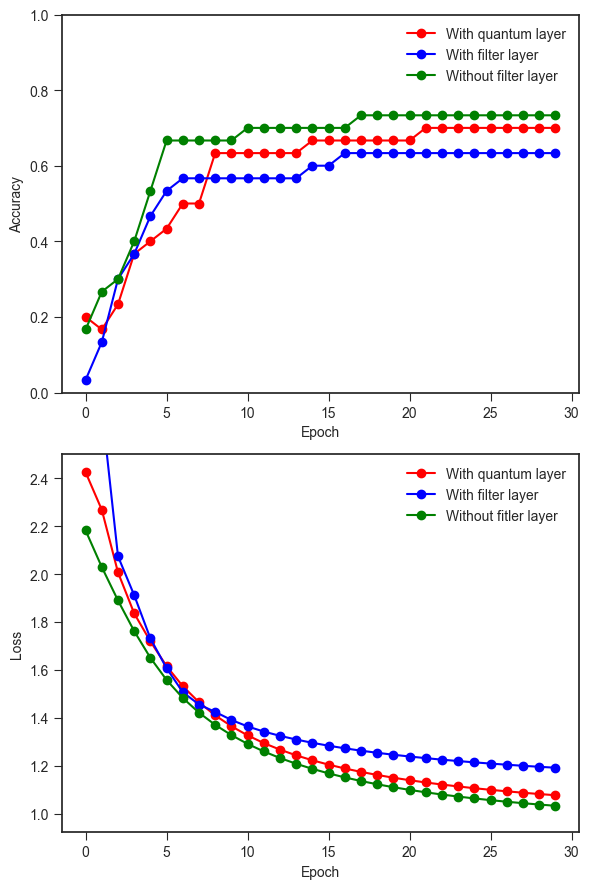

In [17]:
%matplotlib inline
plt.style.use("seaborn-v0_8-ticks")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))

ax1.plot(q_history.history["val_accuracy"], "-or", label="With quantum layer")
ax1.plot(classical_filtered_history.history["val_accuracy"], "-ob", label="With filter layer")
ax1.plot(classical_history.history["val_accuracy"], "-og", label="Without filter layer")
ax1.set_ylabel("Accuracy")
ax1.set_ylim([0, 1])
ax1.set_xlabel("Epoch")
ax1.legend()

ax2.plot(q_history.history["val_loss"], "-or", label="With quantum layer")
ax2.plot(classical_filtered_history.history["val_loss"], "-ob", label="With filter layer")
ax2.plot(classical_history.history["val_loss"], "-og", label="Without fitler layer")
ax2.set_ylabel("Loss")
ax2.set_ylim(top=2.5)
ax2.set_xlabel("Epoch")
ax2.legend()
plt.tight_layout()
plt.show()

In [18]:
np.shape(filtered_train_images)

(50, 14, 14, 4)

In [19]:
np.shape(train_images)

(50, 28, 28, 1)

In [20]:
np.shape(q_train_images)

(50, 14, 14, 4)

In [21]:
classical_filtered_history.history["val_accuracy"][-1]

0.6333333253860474